<h1 align="center"><font color = #DDA0DD>Your Data Will Look Gorgeous</font></h1>

Data can be hard to analyze sometimes. Looking at those entries, trying to understand what is what... Tough! Visualizing can be very helpful for that problem. Looking at those colorful plots makes it all easier to get a grip on.

I can't say I'm good at this. But with this article I hope, I can learn, and give you some insights about this important task. Let's start then!

We're going to use iris dataset. Data contains 4 numeric columns, 1 categoric columns. It'll be easy to start. We'll use 'Seaborn' library to fetch the data.

## 💥 Importing Libraries & Fetching The Data

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


> We will refer to the rows of the matrix as *samples*, and the number of rows as **n_sapmles**.

> We will refer to the columns of the matrix as *feature*, and the number of columns as **n_feature**.

> *The samples (every row) might be a flower, a person, a document, an image, a sound file, a video, as astronomical object, or anything else you can describe with a set of quantitative measurements.*

> *The target array is the quantity we want to predict from the data: in statistical term, it is the dependent variable. Like 'species' in this dataset. Flowers species is dependent to 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' features. Our model will make predictions about flowers 'species' by using these features.*

The definitions above are quotes from 'Python Data Science Handbook'. I just wanted to give some information about dependent, and independent variables.

<font color = red>**Using magic function '%matplotlib inline' serves the purpose of including your plots to your notebook.**</font>

<font color = red>**With 'plt.style.use('seaborn-darkgrid'), we set the style for our plots. You can see other options with 'plt.style.available'.**</font>

## 💥 Pairplot

We'll start with the easiest one. 'sns.pairplot' draws the relationships between all the columns in the data set. With 'hue' in it, we state that it should separate the data by colors according to the categories we have determined.

In [2]:
%matplotlib inline
plt.style.use('seaborn-darkgrid')

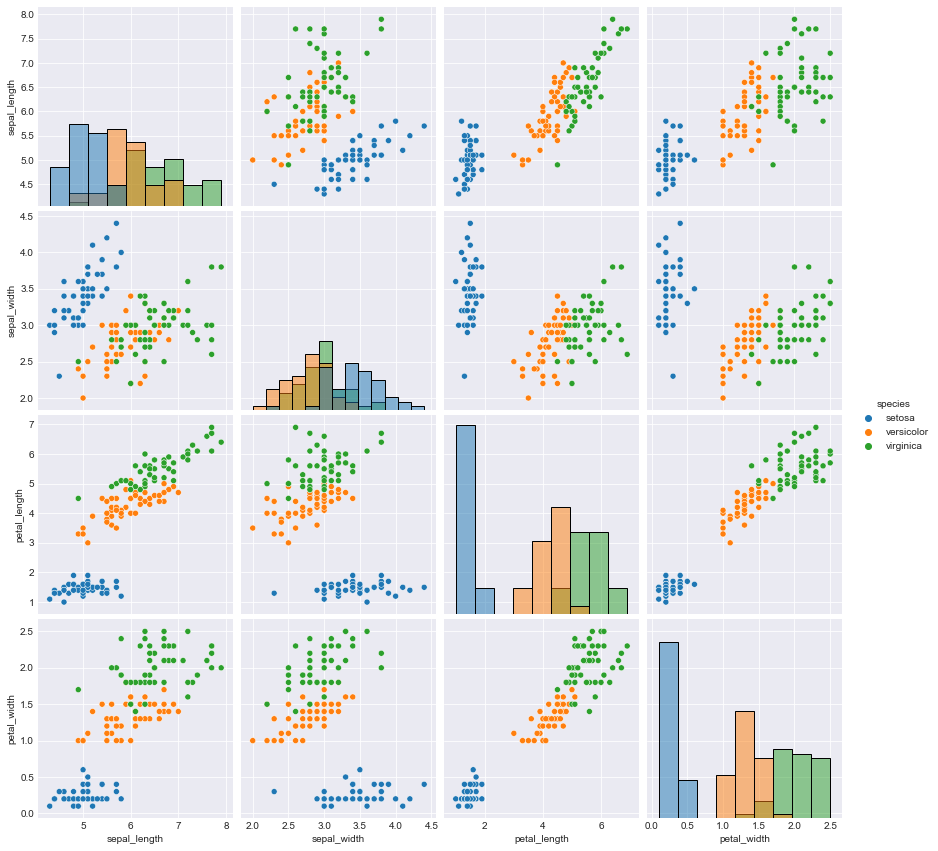

In [3]:
sns.pairplot(iris, hue='species', height=3, diag_kind = 'hist');

See? How amazing it looks! Colors will change with your plot style.

In [4]:
# Let's check datas shape

iris.shape

(150, 5)

In [5]:
# Let's check the values of species column has

iris.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

## 💥 Plot

Matplotlib has a very useful, and easy method to plot. You can specifiy x, and y axes within this method. With 'marker' attribute you can change the way your dots looks.

* See more for marker style with this <a href=https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html>link</a>.

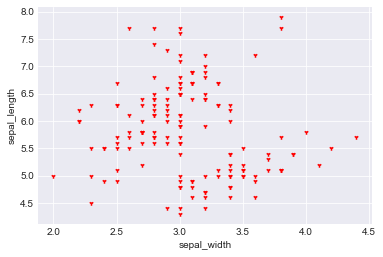

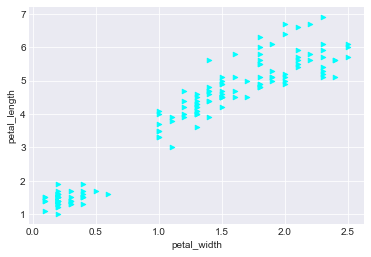

In [6]:
# Easiest plot we can do

iris.plot(kind = 'scatter', x = 'sepal_width', y = 'sepal_length', color = 'red', marker = '1')
iris.plot(kind = 'scatter', x = 'petal_width', y = 'petal_length', color = 'cyan', marker = '>');

## 💥 FacetGrid

I met with .FacetGrid method recently but I loved it. It's really useful, and fun to make.
With this method, we can determine certain conditions and draw relationships accordingly. We need to map plots.

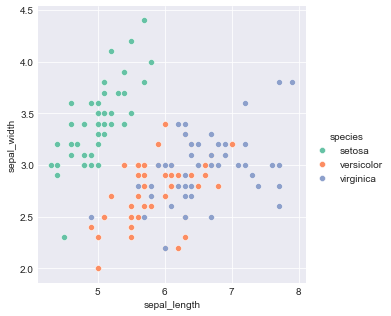

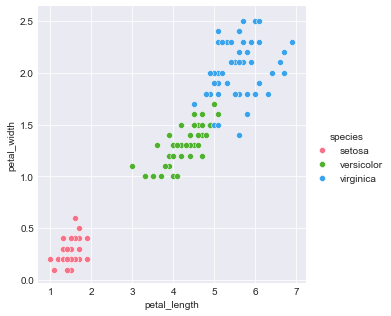

In [7]:
sns.FacetGrid(iris, hue="species", palette="Set2", height=4.5) \
   .map(sns.scatterplot, "sepal_length", "sepal_width") \
   .add_legend();

sns.FacetGrid(iris, hue="species", palette="husl", height=4.5) \
   .map(sns.scatterplot, "petal_length", "petal_width") \
   .add_legend();

Let's interpret this:
* Setosa species has low petal_length, and petal_width but has more sepal_width.
* Virginica species has high petal length, and width.

## 💥 Subplot

Sometimes we may want to draw more than one plot. Instead of doing this in individual cells, we can visually see multiple relationships in a single row with the .subplots method.

* First, we need to indicate, how many rows, and columns we want. We'll draw 4 plot, so we need 2 rows, and 2 columns.
* fig is our whole figure, ax is the every plot in this figure.
* We can draw different kind of plots in this figure. They don't have to be the same.
* ax attribute in them specify which plot we want it to draw.
* We can change the title of every plot with .set_xlabel method.

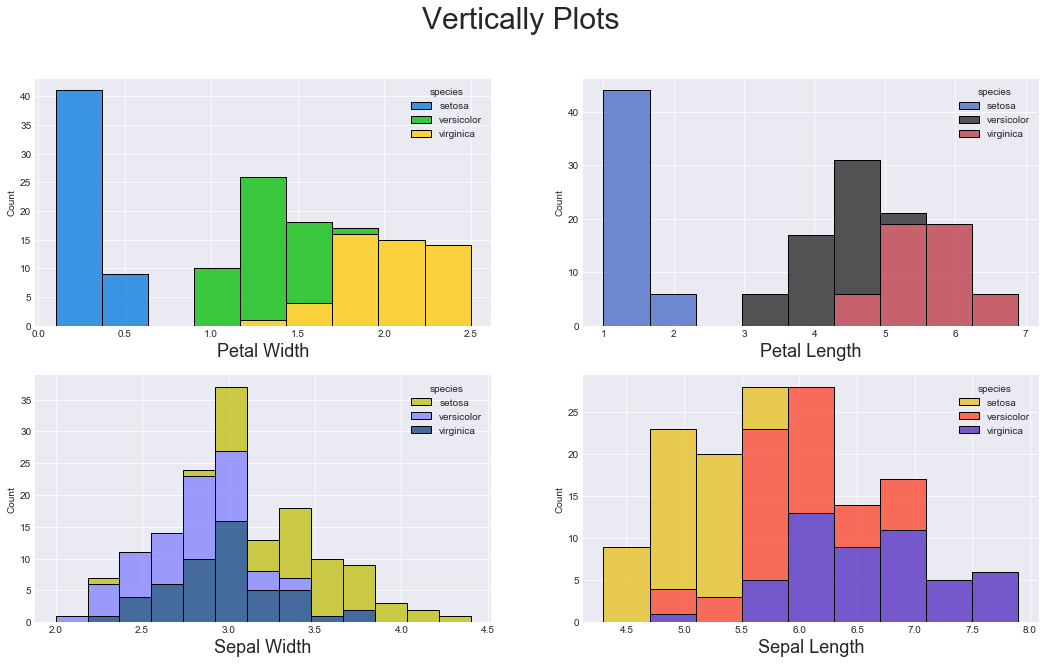

In [8]:
fig, ax = plt.subplots(2, 2, figsize = (18, 10))
fig.suptitle('Vertically Plots', fontsize = 30)


sns.histplot(ax = ax[0, 0], data=iris, x="petal_width", hue="species",
             multiple="stack", palette = 'nipy_spectral')
ax[0,0].set_xlabel('Petal Width', fontsize = 18)

sns.histplot(ax = ax[0, 1], data=iris, x="petal_length", hue="species",
             multiple="stack", palette = 'icefire')
ax[0,1].set_xlabel('Petal Length', fontsize = 18)

sns.histplot(ax = ax[1, 0], data=iris, x="sepal_width", hue="species",
             multiple="stack", palette = 'gist_stern_r')
ax[1,0].set_xlabel('Sepal Width', fontsize = 18)

sns.histplot(ax = ax[1, 1], data=iris, x="sepal_length", hue="species",
             multiple="stack", palette = 'CMRmap_r')
ax[1,1].set_xlabel('Sepal Length', fontsize = 18);

## 💥 Boxplot

Boxplot is the plot that allows us to see the distribution among the data clearly. With this plot, we can see and interpret outlier values.

## 💥 Jointplot

Draw a plot of two variables with bivariate and univariate graphs.

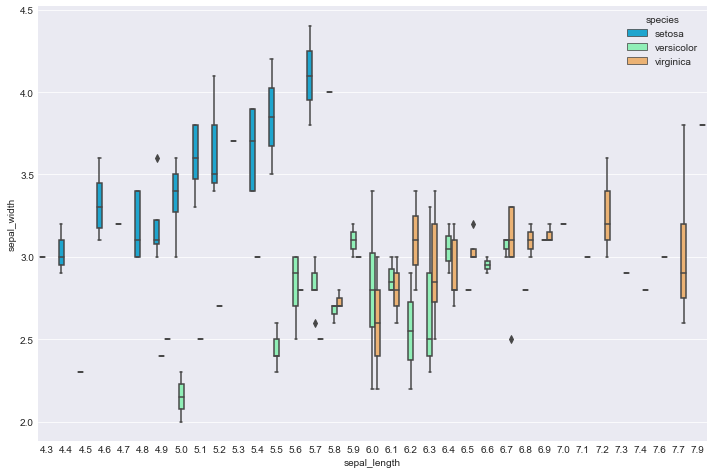

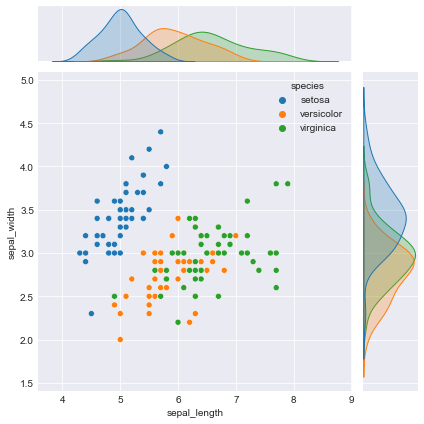

In [9]:
plt.figure(figsize = (12, 8))

sns.boxplot(data = iris, x = 'sepal_length', y = 'sepal_width',
               hue = 'species', palette = 'rainbow')

sns.jointplot(data = iris, x = 'sepal_length',
           y = 'sepal_width', hue = 'species');

## 💥 Heatmap

It allows you to understand the relationship between features with colors.

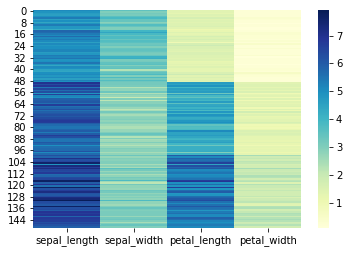

In [5]:
iris2 = iris.drop('species', axis = 1)
sns.heatmap(iris2, cmap = 'YlGnBu');